# Question 2

## **Question 2: K-means Clustering**

### **Dataset Name:** `plant_health_data.csv`
### **Dataset Link:** `https://www.kaggle.com/datasets/ziya07/plant-health-data`

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from threadpoolctl import threadpool_limits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [54]:
file_path = 'plant_health_data.csv'
plant_health_data = pd.read_csv(file_path)


print("Dataset Shape:", plant_health_data.shape)
print("Columns:", plant_health_data.columns)
print("Missing Values:\n", plant_health_data.isnull().sum())
plant_health_data.head()

Dataset Shape: (1200, 14)
Columns: Index(['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature',
       'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH',
       'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level',
       'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status'],
      dtype='object')
Missing Values:
 Timestamp                 0
Plant_ID                  0
Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64


,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


### 2. Data Preprocessing

In [57]:
# Load the dataset
data = pd.read_csv('plant_health_data.csv')

# Preview the first few rows
print("Data Preview:\n", data.head())

# Check data types and summary information
print("\nData Types:\n", data.info())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Fill missing values with the mean of numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handle categorical data using One-Hot Encoding
if 'Plant_Health_Status' in data.columns:
    data = pd.get_dummies(data, columns=['Plant_Health_Status'])

# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])

# Store the scaled data in a new DataFrame
processed_data = pd.DataFrame(scaled_data, columns=numeric_columns)

# Display the first few rows of the processed data
print("\nProcessed Data:\n", processed_data.head())

Data Preview:
                     Timestamp  Plant_ID  Soil_Moisture  Ambient_Temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   Soil_Temperature   Humidity  Light_Intensity   Soil_pH  Nitrogen_Level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   Phosphorus_Level  Potassium_Level  Chlorophy

3. Determining Optimal Clusters (k)

Dataset Shape: (1200, 14)
Columns: Index(['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature',
       'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH',
       'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level',
       'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status'],
      dtype='object')
Missing Values:
 Timestamp                 0
Plant_ID                  0
Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64


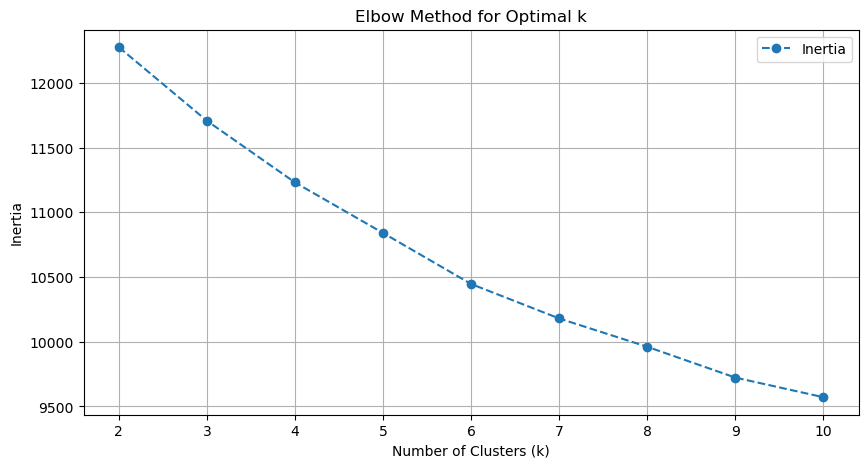

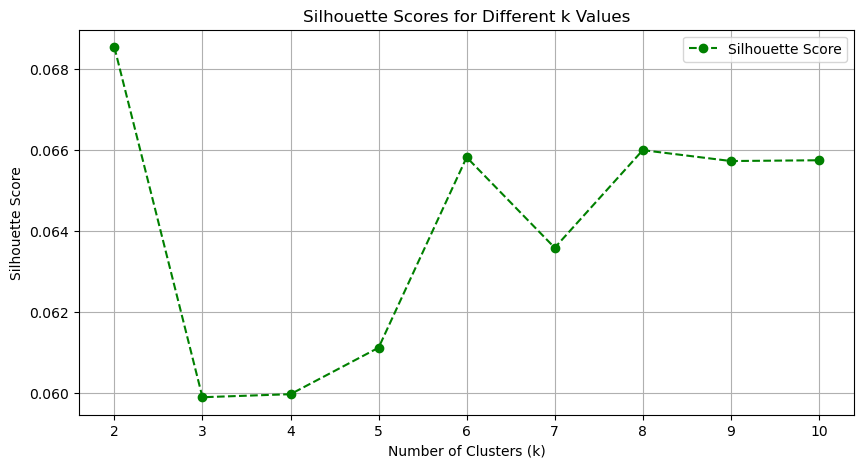

Cluster Summary Statistics:
          Soil_Moisture  Ambient_Temperature  Soil_Temperature  Humidity  \
Cluster                                                                   
0             0.479506            -0.901253         -0.289857 -0.126426   
1             0.180081             0.433579          0.402113  0.289560   
2            -0.086780             0.200045         -0.115595  0.022530   
3            -0.610720             0.306853          0.017798 -0.188562   

         Light_Intensity   Soil_pH  Nitrogen_Level  Phosphorus_Level  \
Cluster                                                                
0               0.418545  0.024472       -0.034746         -0.305888   
1              -0.192168 -1.035014       -0.115309         -0.092720   
2              -0.059733  0.635242       -0.344731          0.286198   
3              -0.187408  0.371039        0.524690          0.120465   

         Potassium_Level  Chlorophyll_Content  Electrochemical_Signal  
Cluster        

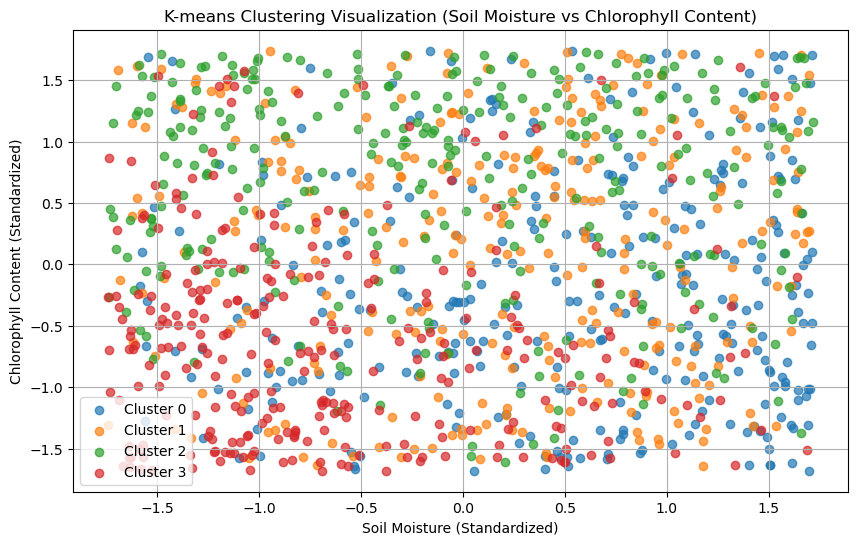

Silhouette Score for k=4: 0.05995905566939714


In [60]:
# Suppress specific warnings related to KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Set the number of threads to avoid MKL warning
os.environ["OMP_NUM_THREADS"] = "5"

# Load the dataset
file_path = 'plant_health_data.csv'
plant_health_data = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Shape:", plant_health_data.shape)
print("Columns:", plant_health_data.columns)
print("Missing Values:\n", plant_health_data.isnull().sum())

# Drop irrelevant columns
columns_to_drop = ['Timestamp', 'Plant_ID', 'Plant_Health_Status']
preprocessed_data = plant_health_data.drop(columns=columns_to_drop)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(preprocessed_data)

# Convert scaled data to a DataFrame for readability
scaled_data_df = pd.DataFrame(scaled_data, columns=preprocessed_data.columns)

# Determine the optimal number of clusters using Elbow Method and Silhouette Scores
inertia = []
silhouette_scores = []
k_values = range(2, 11)

with threadpool_limits(limits=5, user_api='blas'):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score', color='green')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

# Apply K-means clustering with the optimal number of clusters (k=4 as observed earlier)
optimal_k = 4
with threadpool_limits(limits=5, user_api='blas'):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_

# Add cluster labels to the scaled DataFrame
scaled_data_df['Cluster'] = cluster_labels

# Calculate descriptive statistics for each cluster
cluster_summary = scaled_data_df.groupby('Cluster').mean()
print("Cluster Summary Statistics:\n", cluster_summary)

# Visualize clusters using two key features
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = scaled_data_df[scaled_data_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Soil_Moisture'],
        cluster_data['Chlorophyll_Content'],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

# Add labels and legend
plt.title('K-means Clustering Visualization (Soil Moisture vs Chlorophyll Content)')
plt.xlabel('Soil Moisture (Standardized)')
plt.ylabel('Chlorophyll Content (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate clustering quality using Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

### 4. Applying K-means Clustering

In [62]:
# Apply K-means clustering with k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Add cluster labels to the scaled DataFrame
scaled_data_df['Cluster'] = cluster_labels

# Calculate descriptive statistics for each cluster
cluster_summary = scaled_data_df.groupby('Cluster').mean()
print(cluster_summary)

         Soil_Moisture  Ambient_Temperature  Soil_Temperature  Humidity  \
Cluster                                                                   
0             0.479506            -0.901253         -0.289857 -0.126426   
1             0.180081             0.433579          0.402113  0.289560   
2            -0.086780             0.200045         -0.115595  0.022530   
3            -0.610720             0.306853          0.017798 -0.188562   

         Light_Intensity   Soil_pH  Nitrogen_Level  Phosphorus_Level  \
Cluster                                                                
0               0.418545  0.024472       -0.034746         -0.305888   
1              -0.192168 -1.035014       -0.115309         -0.092720   
2              -0.059733  0.635242       -0.344731          0.286198   
3              -0.187408  0.371039        0.524690          0.120465   

         Potassium_Level  Chlorophyll_Content  Electrochemical_Signal  
Cluster                                     

### 5. Visualizing Clusters

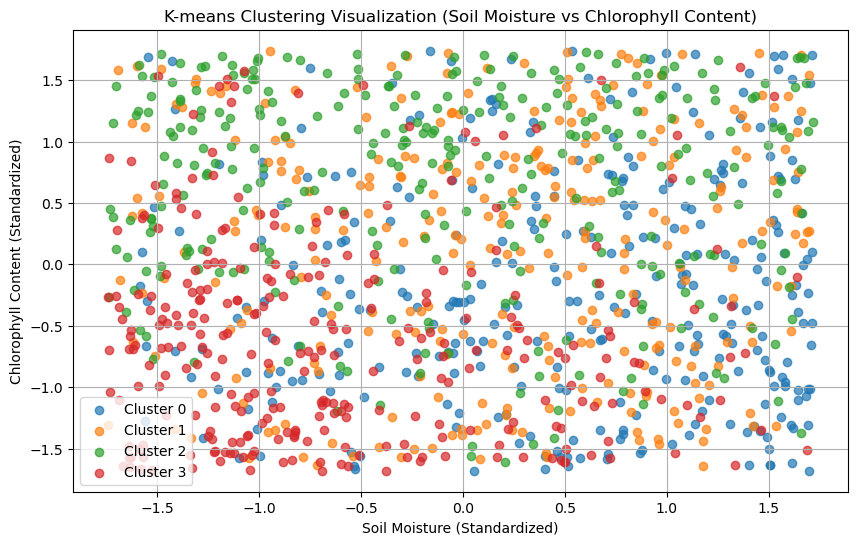

In [64]:
# Visualize clusters using two key features
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = scaled_data_df[scaled_data_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Soil_Moisture'],
        cluster_data['Chlorophyll_Content'],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

# Add labels and legend
plt.title('K-means Clustering Visualization (Soil Moisture vs Chlorophyll Content)')
plt.xlabel('Soil Moisture (Standardized)')
plt.ylabel('Chlorophyll Content (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

### 6. Evaluating Clustering Quality

In [66]:

silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score for k=4: {silhouette_avg}')

# Display descriptive statistics for clusters
cluster_summary


Silhouette Score for k=4: 0.05995905566939714


,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Cluster,,,,,,,,,,,
0,0.479506,-0.901253,-0.289857,-0.126426,0.418545,0.024472,-0.034746,-0.305888,-0.229977,-0.201864,-0.262293
1,0.180081,0.433579,0.402113,0.289560,-0.192168,-1.035014,-0.115309,-0.092720,-0.224942,0.130343,0.035845
2,-0.086780,0.200045,-0.115595,0.022530,-0.059733,0.635242,-0.344731,0.286198,0.082616,0.652012,0.697575
3,-0.610720,0.306853,0.017798,-0.188562,-0.187408,0.371039,0.524690,0.120465,0.393084,-0.613178,-0.498575
